In [1]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from jax import grad, jit
import optax


from microcity.geom import resample_polyline

In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

def plot_original_and_resampled(original_points: jnp.ndarray,
                                resampled_points: jnp.ndarray):
    """
    Plot the original and the resampled polylines using matplotlib.
    
    Parameters
    ----------
    original_points : jax.numpy.ndarray
        The original Nx2 JAX array of (x, y) coordinates.
    
    resampled_points : jax.numpy.ndarray
        The resampled Mx2 JAX array of (x, y) coordinates.
    """
    # Convert JAX arrays to NumPy for plotting
    original_points_np = np.array(original_points)
    resampled_points_np = np.array(resampled_points)
    
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot the original polyline (connected by lines)
    ax.plot(original_points_np[:, 0], original_points_np[:, 1],
            '-o', label="Original", color='blue', alpha=0.3)
    
    # Plot the resampled polyline (connected by lines)
    ax.plot(resampled_points_np[:, 0], resampled_points_np[:, 1],
            '-o', label="Resampled", color='red', alpha=0.3)
    
    ax.set_aspect('equal', 'box')
    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    # Show the plot
    plt.show()

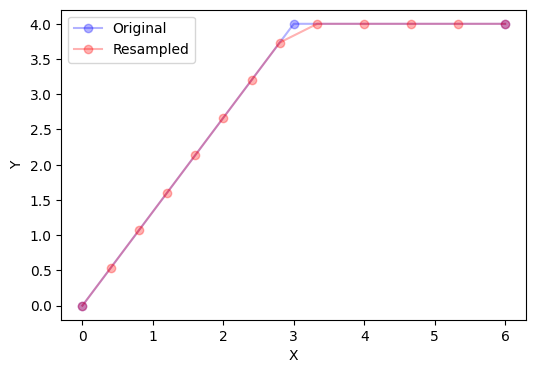

In [3]:
# Example original polyline (in JAX) -- simple triangular path
original_points = jnp.array([
    [0.0, 0.0],
    [3.0, 4.0],
    [6.0, 4.0]
])

# Get the resampled polyline
resampled_points = resample_polyline(original_points, max_step=0.7)

# Plot them
plot_original_and_resampled(original_points, resampled_points)


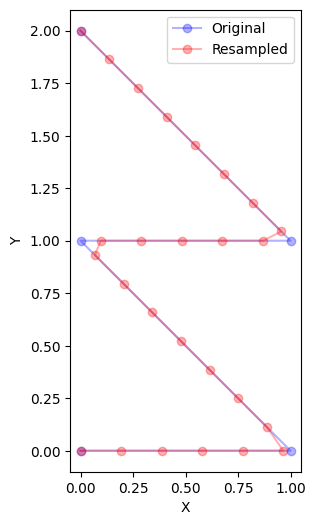

In [4]:
# Example original polyline (in JAX) -- simple triangular path
original_points = jnp.array([
    [0.0, 0.0],
    [1.0, 0.0],
    [0.0, 1.0],
    [1.0, 1.0],
    [0.0, 2.0],
])

# Get the resampled polyline
resampled_points = resample_polyline(original_points, max_step=0.2)

# Plot them
plot_original_and_resampled(original_points, resampled_points) 


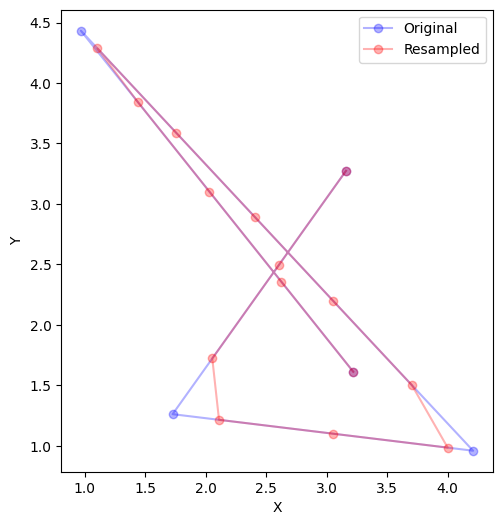

In [5]:
key = jax.random.PRNGKey(42)
# Generate random points in [0, 5)
random_points = 5.0 * jax.random.uniform(key, shape=(5, 2))
max_step = 1.0

new_points = resample_polyline(random_points, max_step)
assert new_points.shape[0] >= 2, "Should have at least the start and end points."
assert not jnp.isnan(
    new_points
).any(), "No NaNs expected in computed resampled points."

plot_original_and_resampled(random_points, new_points)